## Import Libraries and Packages

In [1]:
import pandas as pd

import plotly.graph_objects as go
import plotly.express as px
import plotly.subplots as sp
import plotly.figure_factory as ff

from itertools import cycle
import re

import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import plot_tree

from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


## Loading the Dataset

In [2]:
df = pd.read_csv("/kaggle/input/palmer-archipelago-antarctica-penguin-data/penguins_size.csv")
df.columns = [x.lower() for x in df.columns]
pd.set_option('display.max_columns', 40)
df.head(5)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


## Missing values

In [3]:
na_val = df.isnull().sum()
na_per = round(100 * df.isnull().sum() / len(df),2).sort_values(ascending=False)
mis_val_table = pd.concat([na_val, na_per], axis=1)
mis_val_table = mis_val_table.rename(columns = {0 : 'number of missing values', 1 : 'percent of total values'})
mis_val_table

,number of missing values,percent of total values
species,0,0.00
island,0,0.00
culmen_length_mm,2,0.58
culmen_depth_mm,2,0.58
flipper_length_mm,2,0.58
body_mass_g,2,0.58
sex,10,2.91


In [4]:
df = df.dropna()
df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

## Unique values

In [5]:
df_un = pd.concat([pd.Series(df.island.unique()), pd.Series(df.species.unique()),pd.Series(df.sex.unique())], axis=1)
df_un = df_un.rename(columns = {0 : 'unique island', 1 : 'unique species', 2 : 'unique sex'})
df_un

,unique island,unique species,unique sex
0,Torgersen,Adelie,MALE
1,Biscoe,Chinstrap,FEMALE
2,Dream,Gentoo,.


In [6]:
df.drop(df.loc[df["sex"] == '.'].index, inplace=True)

In [7]:
df['sex'].unique()

array(['MALE', 'FEMALE'], dtype=object)

## Exploratory data analysis of penguins

In [8]:
palette = cycle(px.colors.sequential.thermal)

fig = sp.make_subplots(
    rows=1, 
    cols=3,
    horizontal_spacing=0.08,
    subplot_titles=[
        "Species",
        "Island",
        "Sex"],
        specs=[[{"type": "pie"}, {"type": "pie"}, {"type": "pie"}]],
        vertical_spacing = 0.1
)

species_counts = df.species.value_counts()

species_p = go.Pie(
    labels=species_counts.index,
    values=species_counts,
    name="Species",
    textinfo='percent+label',
    hoverinfo="label+value+percent",
    marker_colors=[next(palette) for i in range(len(species_counts))],
    legendgroup="Species",
    legendgrouptitle_text="Species",
)

island_counts = df.island.value_counts()

island = go.Pie(
    labels=island_counts.index,
    values=island_counts,
    name="Island",
    textinfo='percent+label',
    hoverinfo="label+value+percent",
    marker_colors=[next(palette) for i in range(len(island_counts))],
    legendgroup="Island",
    legendgrouptitle_text="Island",
)

sex_counts = df.sex.value_counts()

sex = go.Pie(
    labels=sex_counts.index,
    values=sex_counts,
    name="Sex",
    textinfo='percent+label',
    hoverinfo="label+value+percent",
    marker_colors=[next(palette) for i in range(len(sex_counts))],
    legendgroup="Sex",
    legendgrouptitle_text="Sex",
)

fig.add_trace(species_p, row=1, col=1)
fig.update_xaxes(title_text="Species", row=1, col=1)
fig.update_yaxes(title_text="Count", row=1, col=1)

fig.add_trace(island, row=1, col=2)
fig.update_xaxes(title_text="Island", row=1, col=2)
fig.update_yaxes(title_text="Count", row=1, col=2)

fig.add_trace(sex, row=1, col=3)
fig.update_xaxes(title_text="Fedu", row=1, col=3)
fig.update_yaxes(title_text="Count", row=1, col=3)

fig.update_layout(
    template="plotly",
    height=430,
)

fig.update(
    layout_title_text="Penguins Characteristics",
    layout_title_font_size=30,
    layout_title_x=0.5,
    layout_paper_bgcolor='rgb(229, 237, 247)',
    layout_plot_bgcolor='rgb(229, 237, 247)',
)

fig.show()

## Distribution of Penguins Characteristics

In [9]:
palette = cycle(px.colors.sequential.thermal)

fig = sp.make_subplots(
    rows=2, 
    cols=2,
    horizontal_spacing=0.08,
    subplot_titles=[
        "Culmen length",
        "Culmen depth",
        "Flipper length",
        "Body mass"],
        vertical_spacing = 0.1
)

culmen_length_mm = go.Histogram(
    x=df.culmen_length_mm,
    name="Culmen length",
    marker_color=next(palette),
    legendgroup="Culmen length",
    legendgrouptitle_text="Culmen length",
)

culmen_depth_mm = go.Histogram(
    x=df.culmen_depth_mm,
    name="Culmen depth",
    marker_color=next(palette),
    legendgroup="Culmen depth",
    legendgrouptitle_text="Culmen depth",
)

flipper_length_mm = go.Histogram(
    x=df.flipper_length_mm,
    name="Flipper length",
    marker_color=next(palette),
    legendgroup="Flipper length",
    legendgrouptitle_text="Flipper length",
)

body_mass_g = go.Histogram(
    x=df.body_mass_g,
    name="Body mass",
    marker_color=next(palette),
    legendgroup="Body mass",
    legendgrouptitle_text="Body mass",
)

fig.add_trace(culmen_length_mm, row=1, col=1)
fig.update_xaxes(title_text="Culmen length", row=1, col=1)
fig.update_yaxes(title_text="Count", row=1, col=1)

fig.add_trace(culmen_depth_mm, row=1, col=2)
fig.update_xaxes(title_text="Culmen depth", row=1, col=2)
fig.update_yaxes(title_text="Count", row=1, col=2)

fig.add_trace(flipper_length_mm, row=2, col=1)
fig.update_xaxes(title_text="Flipper length", row=2, col=1)
fig.update_yaxes(title_text="Count", row=2, col=1)

fig.add_trace(body_mass_g, row=2, col=2)
fig.update_xaxes(title_text="Body mass", row=2, col=2)
fig.update_yaxes(title_text="Count", row=2, col=2)

fig.update_layout(
    template="plotly",
    height=1000,
)

fig.update(
    layout_title_text="Distribution of Penguins Characteristics",
    layout_title_font_size=30,
    layout_title_x=0.5,
    layout_paper_bgcolor='rgb(229, 237, 247)',
    layout_plot_bgcolor='rgb(229, 237, 247)',
)

fig.show()

## Relationship between features

In [10]:
fig = px.scatter_matrix(df, 
                        dimensions=["culmen_length_mm", "culmen_depth_mm", "flipper_length_mm", "body_mass_g"], 
                        color="species")

fig.update_layout(template="plotly", height=800)

fig.update(
    layout_title_text="Relationship between features by species",
    layout_title_font_size=30,
    layout_title_x=0.5,
    layout_paper_bgcolor='rgb(229, 237, 247)',
    layout_plot_bgcolor='rgb(229, 237, 247)',
)
fig.show()

In [11]:
fig = px.scatter_matrix(df, 
                        dimensions=["culmen_length_mm", "culmen_depth_mm", "flipper_length_mm", "body_mass_g"], 
                        color="sex")

fig.update_layout(template="plotly", height=800)

fig.update(
    layout_title_text="Relationship between features by sex",
    layout_title_font_size=30,
    layout_title_x=0.5,
    layout_paper_bgcolor='rgb(229, 237, 247)',
    layout_plot_bgcolor='rgb(229, 237, 247)',
)
fig.show()

## Distribution of the variables by species

In [12]:
palette = cycle(px.colors.sequential.thermal)

fig = sp.make_subplots(
    rows=2, 
    cols=2,
    horizontal_spacing=0.08,
    subplot_titles=[
        "Culmen length",
        "Culmen depth",
        "Flipper lengt",
        "Body mass",],
        vertical_spacing = 0.1
)

culmen_length_mm_box = go.Box(
    x = df.species,
    y = df.culmen_length_mm,
    name="Culmen length",
    legendgroup="Culmen length",
    legendgrouptitle_text="Culmen length",
    marker_color=next(palette),
)

culmen_depth_mm_box = go.Box(
    x = df.species,
    y = df.culmen_depth_mm,
    name="Culmen depth",
    legendgroup="Culmen depth",
    legendgrouptitle_text="Culmen depth",
    marker_color=next(palette),
)

flipper_length_mm_box = go.Box(
    x = df.species,
    y = df.flipper_length_mm,
    name="Flipper length",
    legendgroup="Flipper length",
    legendgrouptitle_text="Flipper length",
    marker_color=next(palette),
)

body_mass_g_box = go.Box(
    x = df.species,
    y = df.body_mass_g,
    name="Body mass",
    legendgroup="Body mass",
    legendgrouptitle_text="Body mass",
    marker_color=next(palette),
)

fig.add_trace(culmen_length_mm_box, row=1, col=1)
fig.update_xaxes(title_text="Culmen length", row=1, col=1)

fig.add_trace(culmen_depth_mm_box, row=1, col=2)
fig.update_xaxes(title_text="Culmen depth", row=1, col=2)

fig.add_trace(flipper_length_mm_box, row=2, col=1)
fig.update_xaxes(title_text="Flipper length", row=2, col=1)

fig.add_trace(body_mass_g_box, row=2, col=2)
fig.update_xaxes(title_text="Body mass", row=2, col=2)

fig.update_layout(template="plotly", height=1000)

fig.update(
    layout_title_text="Distribution of the variables by species",
    layout_title_font_size=30,
    layout_title_x=0.5,
    layout_paper_bgcolor='rgb(229, 237, 247)',
    layout_plot_bgcolor='rgb(229, 237, 247)',
)

fig.show()

## Distribution of the variables by sex

In [13]:
palette = cycle(px.colors.sequential.thermal)

fig = sp.make_subplots(
    rows=2, 
    cols=2,
    horizontal_spacing=0.08,
    subplot_titles=[
        "Culmen length",
        "Culmen depth",
        "Flipper lengt",
        "Body mass",],
        vertical_spacing = 0.1
)

culmen_length_mm_box = go.Box(
    x = df.sex,
    y = df.culmen_length_mm,
    name="Culmen length",
    legendgroup="Culmen length",
    legendgrouptitle_text="Culmen length",
    marker_color=next(palette),
)

culmen_depth_mm_box = go.Box(
    x = df.sex,
    y = df.culmen_depth_mm,
    name="Culmen depth",
    legendgroup="Culmen depth",
    legendgrouptitle_text="Culmen depth",
    marker_color=next(palette),
)

flipper_length_mm_box = go.Box(
    x = df.sex,
    y = df.flipper_length_mm,
    name="Flipper length",
    legendgroup="Flipper length",
    legendgrouptitle_text="Flipper length",
    marker_color=next(palette),
)

body_mass_g_box = go.Box(
    x = df.sex,
    y = df.body_mass_g,
    name="Body mass",
    legendgroup="Body mass",
    legendgrouptitle_text="Body mass",
    marker_color=next(palette),
)

fig.add_trace(culmen_length_mm_box, row=1, col=1)
fig.update_xaxes(title_text="Culmen length", row=1, col=1)

fig.add_trace(culmen_depth_mm_box, row=1, col=2)
fig.update_xaxes(title_text="Culmen depth", row=1, col=2)

fig.add_trace(flipper_length_mm_box, row=2, col=1)
fig.update_xaxes(title_text="Flipper length", row=2, col=1)

fig.add_trace(body_mass_g_box, row=2, col=2)
fig.update_xaxes(title_text="Body mass", row=2, col=2)

fig.update_layout(template="plotly", height=1000)

fig.update(
    layout_title_text="Distribution of the variables by sex",
    layout_title_font_size=30,
    layout_title_x=0.5,
    layout_paper_bgcolor='rgb(229, 237, 247)',
    layout_plot_bgcolor='rgb(229, 237, 247)',
)

fig.show()

## Correlation analysis of variables

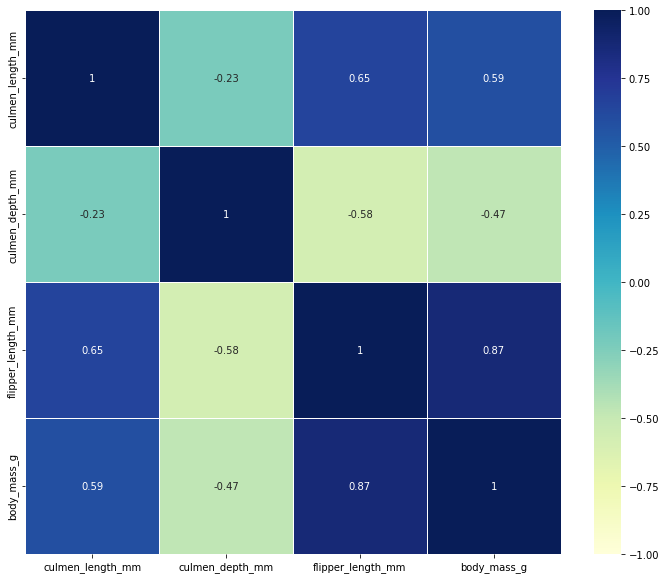

In [14]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), vmin=-1, cmap="YlGnBu", annot=True, linewidths=.5);

## Decision Tree to predict species

In [15]:
df_tree = df.copy()
df_tree['species'] = df_tree['species'].apply(lambda x: 0 if x=='Adelie' else (1 if x=='Chinstrap' else 2))
df_tree['island'] = df_tree['island'].apply(lambda x: 0 if x=='Torgersen' else (1 if x=='Biscoe' else 2))
df_tree['sex'] = df_tree['sex'].apply(lambda x: '0' if x == 'MALE' else '1')
df_tree["sex"] = df_tree["sex"].astype("int64")
df_tree.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,0,39.1,18.7,181.0,3750.0,0
1,0,0,39.5,17.4,186.0,3800.0,1
2,0,0,40.3,18.0,195.0,3250.0,1
4,0,0,36.7,19.3,193.0,3450.0,1
5,0,0,39.3,20.6,190.0,3650.0,0


In [16]:
X, y = df_tree.loc[:,'island':'sex'], df_tree.loc[:,'species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Entropy

In [17]:
model = DecisionTreeClassifier(criterion="entropy")
model.fit(X_train,y_train)
base_preds = model.predict(X_test)

In [18]:
model.score(X_train,y_train)

1.0

In [19]:
model.score(X_test,y_test)

0.97

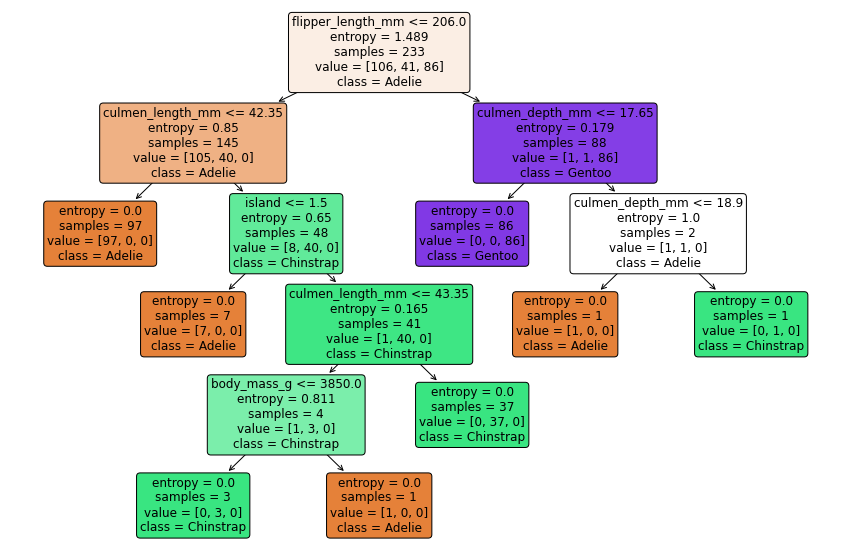

In [20]:
fig = plt.figure(figsize=(15,10))
plot_tree(model,feature_names=df_tree.loc[:,'island':'sex'].columns, 
               class_names=['Adelie', 'Chinstrap', 'Gentoo'], filled=True, rounded=True);

## Gini

In [21]:
model = DecisionTreeClassifier(criterion="gini")
model.fit(X_train,y_train)
base_preds = model.predict(X_test)

In [22]:
model.score(X_train,y_train)

1.0

In [23]:
model.score(X_test,y_test)

0.96

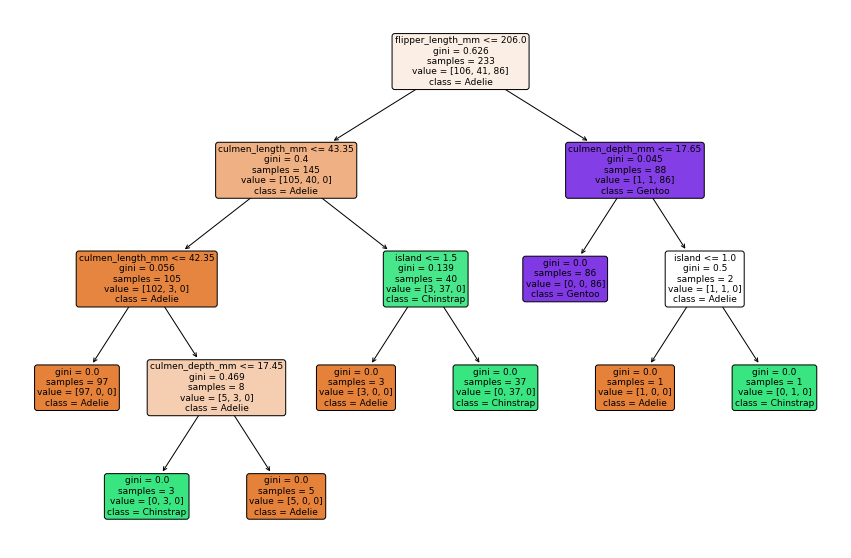

In [24]:
fig = plt.figure(figsize=(15,10))
plot_tree(model,feature_names=df_tree.loc[:,'island':'sex'].columns, 
               class_names=['Adelie', 'Chinstrap', 'Gentoo'], filled=True, rounded=True);

## Decision Tree to predict sex

In [25]:
X, y = df_tree.loc[:,'island':'body_mass_g'], df_tree.loc[:,'sex']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

## Entropy

In [26]:
model = DecisionTreeClassifier(criterion="entropy",max_depth=3)
model.fit(X_train,y_train)
base_preds = model.predict(X_test)

In [27]:
model.score(X_train,y_train)

0.9055793991416309

In [28]:
model.score(X_test,y_test)

0.86

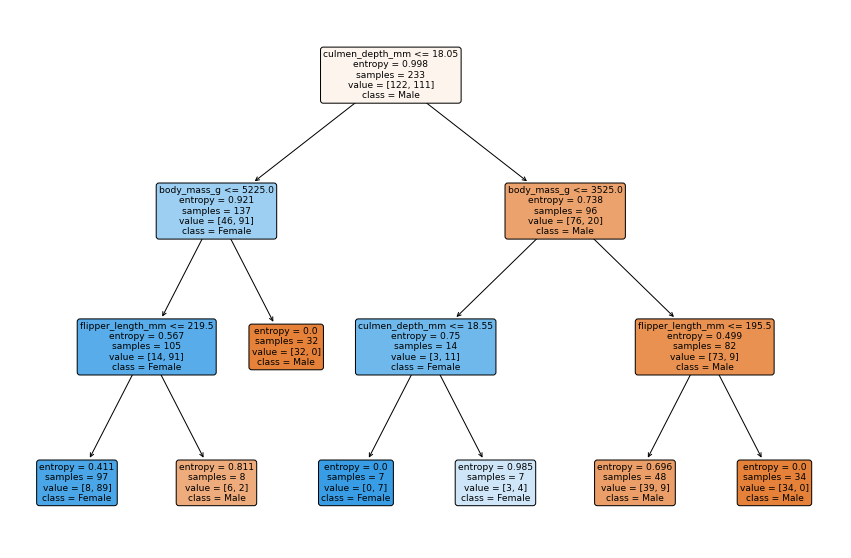

In [29]:
fig = plt.figure(figsize=(15,10))
plot_tree(model, feature_names = df_tree.loc[:,'island':'body_mass_g'].columns, 
               class_names=['Male', 'Female',], filled=True, rounded=True);

## Gini

In [30]:
model = DecisionTreeClassifier(criterion="gini",max_depth=3)
model.fit(X_train,y_train)
base_preds = model.predict(X_test)

In [31]:
model.score(X_train,y_train)

0.9141630901287554

In [32]:
model.score(X_test,y_test)

0.87

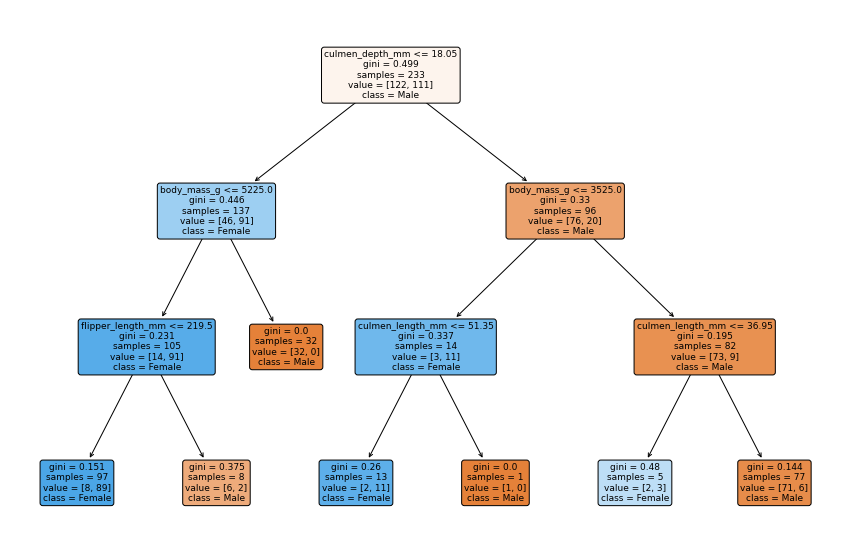

In [33]:
fig = plt.figure(figsize=(15,10))
plot_tree(model, feature_names = df_tree.loc[:,'island':'body_mass_g'].columns, 
               class_names=['Male', 'Female',], filled=True, rounded=True);

## Random Forest

In [34]:
X, y = df_tree.loc[:,'island':'sex'], df_tree.loc[:,'species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Gini

In [35]:

model = RandomForestClassifier(n_estimators=100)
model.fit(X_train,y_train)

RandomForestClassifier()

In [36]:
rf_pred = model.predict(X_test)

In [37]:
metrics.accuracy_score(y_test, rf_pred)

0.98

## The structure of the first decision tree

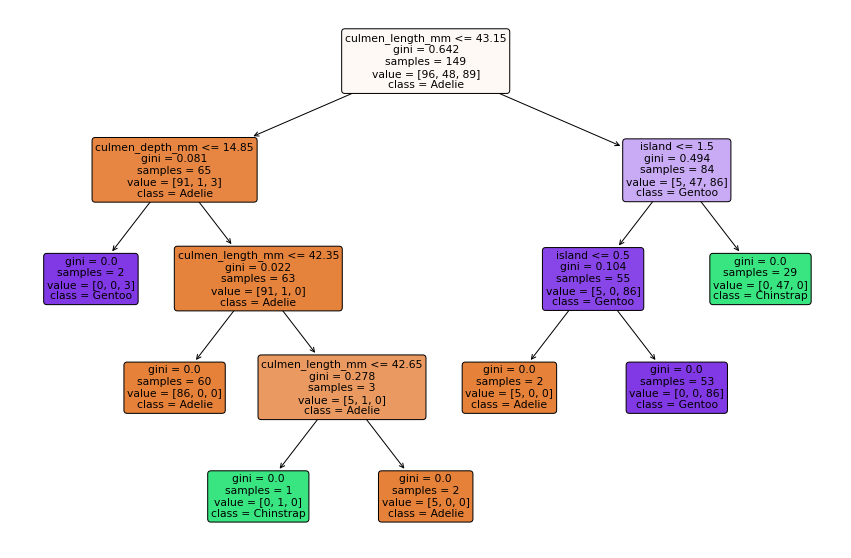

In [38]:
fig = plt.figure(figsize=(15, 10))
plot_tree(model.estimators_[0],
          feature_names=df_tree.loc[:,'island':'sex'].columns, 
               class_names=['Adelie', 'Chinstrap', 'Gentoo'],
          filled=True,
          impurity=True, 
          rounded=True);

## The structure of the last decision tree

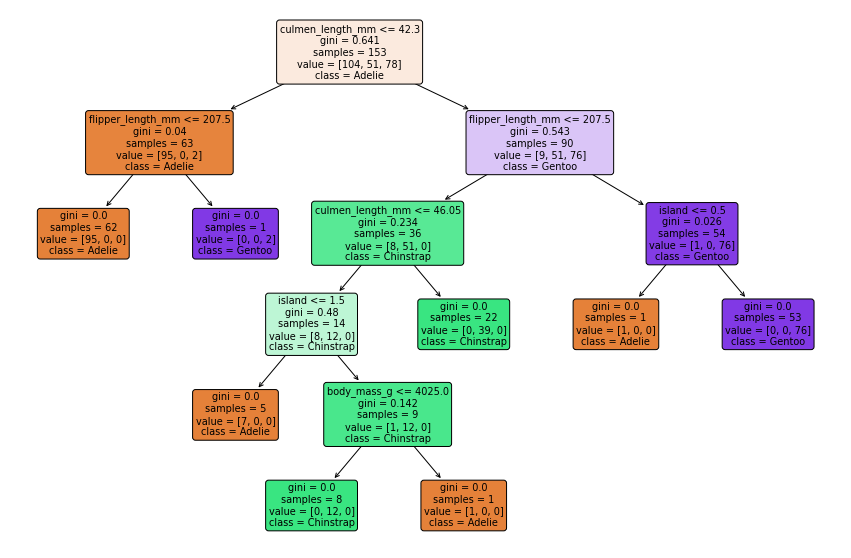

In [39]:
fig = plt.figure(figsize=(15, 10))
plot_tree(model.estimators_[99], 
          feature_names=df_tree.loc[:,'island':'sex'].columns, 
               class_names=['Adelie', 'Chinstrap', 'Gentoo'],
          filled=True,
          impurity=True, 
          rounded=True);

## Entropy

In [40]:
model = RandomForestClassifier(n_estimators=100, criterion='entropy')
model.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy')

In [41]:
rf_pred = model.predict(X_test)

In [42]:
metrics.accuracy_score(y_test, rf_pred)

0.99

## The structure of the first decision tree

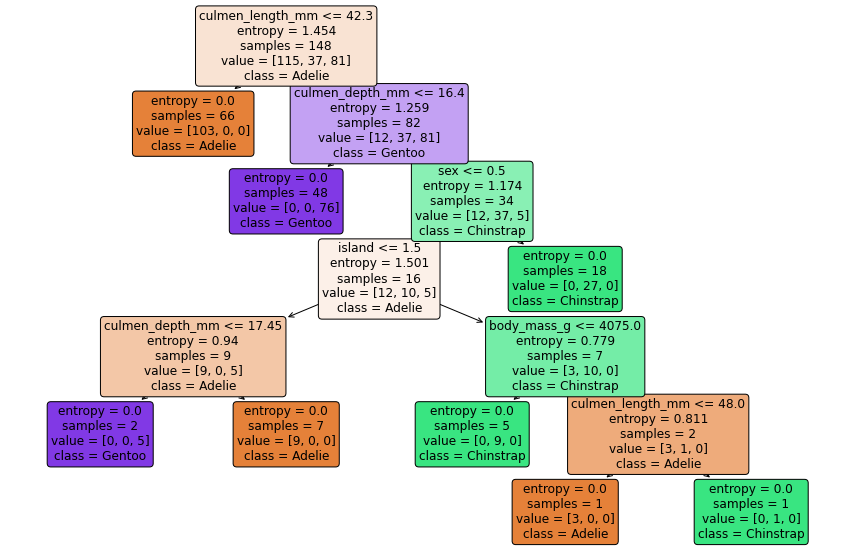

In [43]:
fig = plt.figure(figsize=(15, 10))
plot_tree(model.estimators_[0],
          feature_names=df_tree.loc[:,'island':'sex'].columns, 
               class_names=['Adelie', 'Chinstrap', 'Gentoo'],
          filled=True,
          impurity=True, 
          rounded=True);

## The structure of the last decision tree

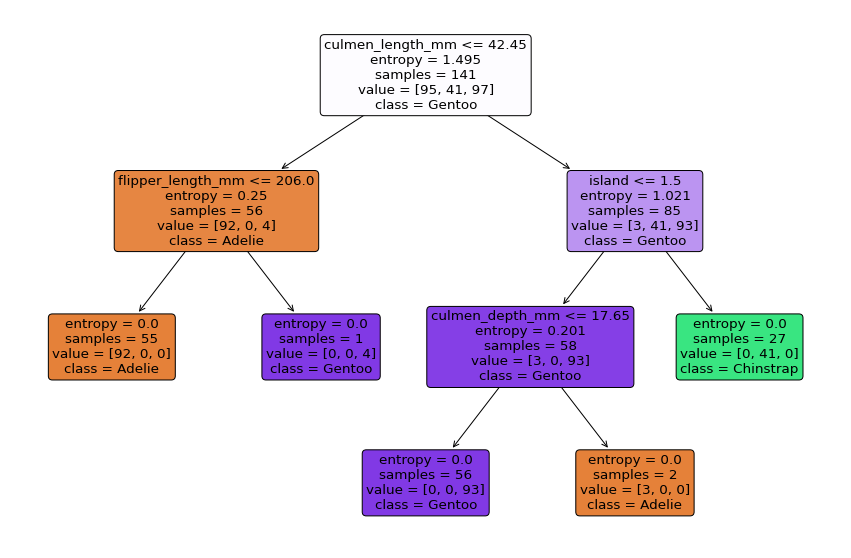

In [44]:
fig = plt.figure(figsize=(15, 10))
plot_tree(model.estimators_[99], 
          feature_names=df_tree.loc[:,'island':'sex'].columns, 
               class_names=['Adelie', 'Chinstrap', 'Gentoo'],
          filled=True,
          impurity=True, 
          rounded=True);

## Random Forest

In [45]:
X, y = df_tree.loc[:,'island':'body_mass_g'], df_tree.loc[:,'sex']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

## Gini

In [46]:
model = RandomForestClassifier(n_estimators=100,max_depth=3)
model.fit(X_train,y_train)

RandomForestClassifier(max_depth=3)

In [47]:
rf_pred = model.predict(X_test)

In [48]:
metrics.accuracy_score(y_test, rf_pred)

0.91

## The structure of the first decision tree

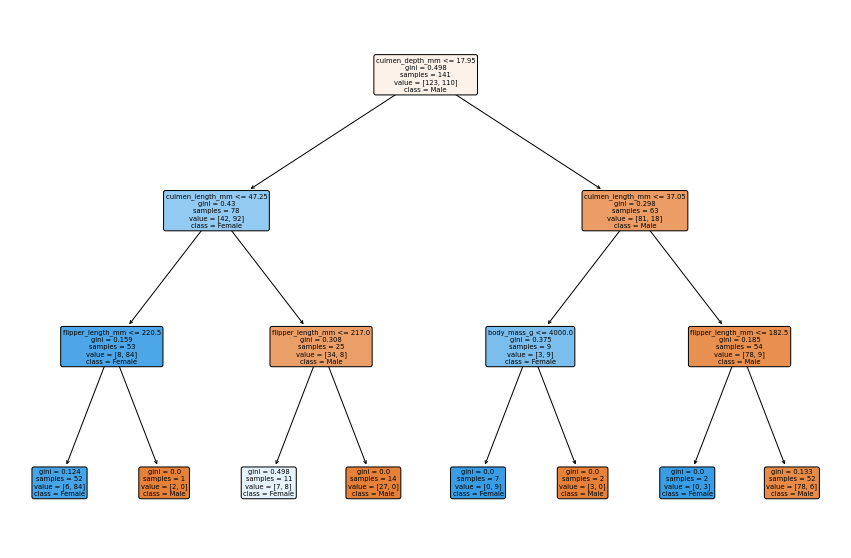

In [49]:
fig = plt.figure(figsize=(15, 10))
plot_tree(model.estimators_[0],
          feature_names=df_tree.loc[:,'island':'body_mass_g'].columns, 
               class_names=['Male', 'Female'],
          filled=True,
          impurity=True, 
          rounded=True);

## The structure of the last decision tree

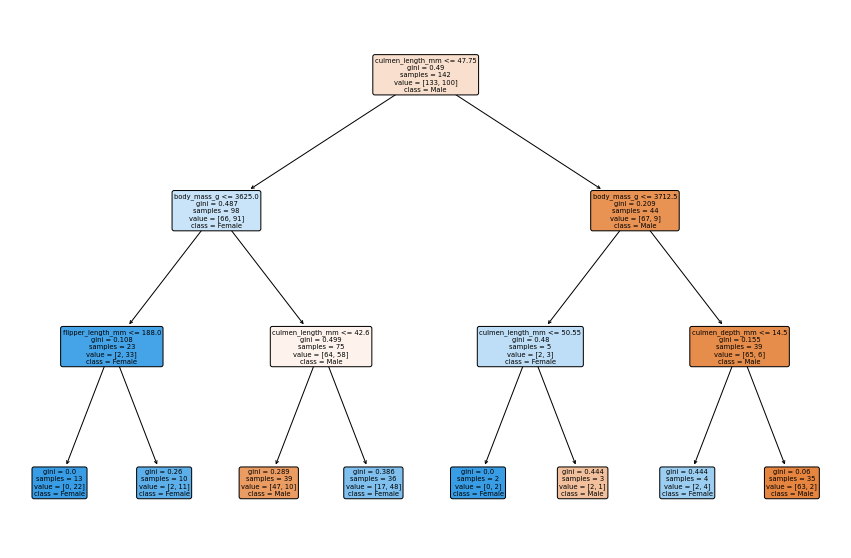

In [50]:
fig = plt.figure(figsize=(15, 10))
plot_tree(model.estimators_[99], 
          feature_names=df_tree.loc[:,'island':'body_mass_g'].columns, 
               class_names=['Male', 'Female'],
          filled=True,
          impurity=True, 
          rounded=True);

In [51]:
X, y = df_tree.loc[:,'island':'body_mass_g'], df_tree.loc[:,'sex']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

## Entropy

In [52]:
model = RandomForestClassifier(n_estimators=100,max_depth=3, criterion="entropy")
model.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=3)

In [53]:
rf_pred = model.predict(X_test)

In [54]:
metrics.accuracy_score(y_test, rf_pred)

0.89

## The structure of the first decision tree

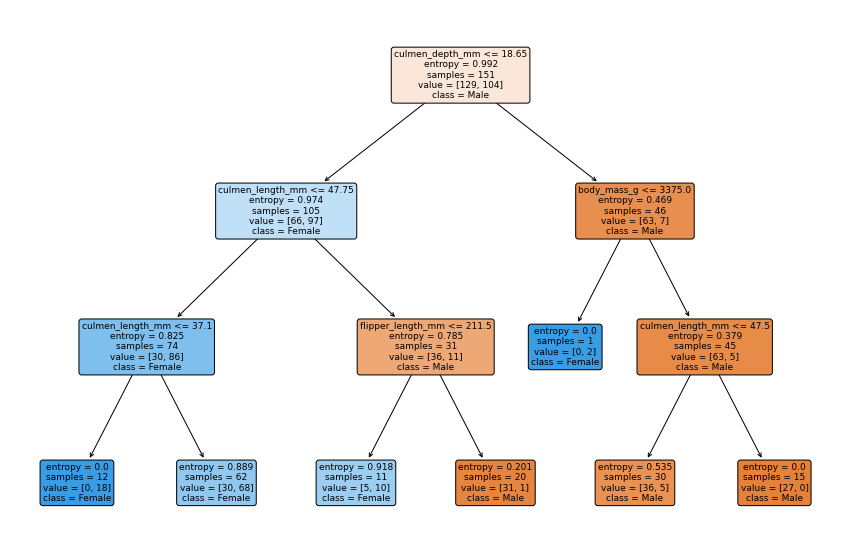

In [55]:
fig = plt.figure(figsize=(15, 10))
plot_tree(model.estimators_[0],
          feature_names=df_tree.loc[:,'island':'body_mass_g'].columns, 
               class_names=['Male', 'Female'],
          filled=True,
          impurity=True, 
          rounded=True);

## The structure of the last decision tree

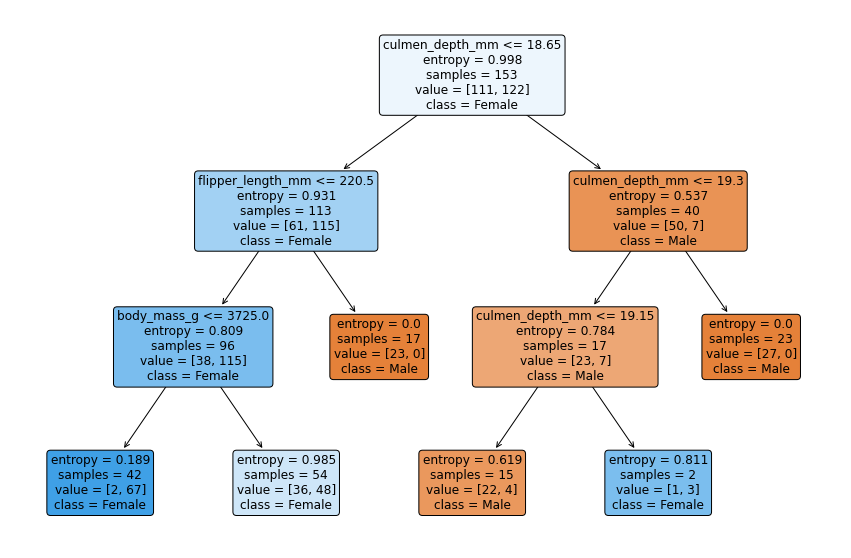

In [56]:
fig = plt.figure(figsize=(15, 10))
plot_tree(model.estimators_[99], 
          feature_names=df_tree.loc[:,'island':'body_mass_g'].columns, 
               class_names=['Male', 'Female'],
          filled=True,
          impurity=True, 
          rounded=True);

## K-Means

In [57]:
df_kn = df.copy()
df_kn = df_kn.loc[:,'culmen_length_mm':'flipper_length_mm']
df_kn.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm
0,39.1,18.7,181.0
1,39.5,17.4,186.0
2,40.3,18.0,195.0
4,36.7,19.3,193.0
5,39.3,20.6,190.0


In [58]:
wcss = []
for i in range (1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_kn)
    wcss.append(kmeans.inertia_)
    
fig = px.line(df, x=range (1, 11), y=wcss)

fig.update_xaxes(title_text="Number of clusters")
fig.update_yaxes(title_text="WCSS")

fig.update_layout(template="plotly", height=400)

fig.update(
    layout_title_text="The Elbow method",
    layout_title_font_size=30,
    layout_title_x=0.5,
    layout_paper_bgcolor='rgb(229, 237, 247)',
    layout_plot_bgcolor='rgb(229, 237, 247)',
)
fig.show()

In [59]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(df_kn)

In [60]:
data_with_clusters = df_kn.copy()
data_with_clusters['species'] = df['species']

In [61]:
fig = px.scatter_3d(data_with_clusters, x = 'culmen_length_mm', y='culmen_depth_mm', z='flipper_length_mm',
              color='species', opacity = 0.8, size_max=30)
fig.update_layout(template="plotly", height=500)

fig.update(
    layout_title_text="Clusters of penguins",
    layout_title_font_size=30,
    layout_title_x=0.5,
    layout_paper_bgcolor='rgb(229, 237, 247)',
    layout_plot_bgcolor='rgb(229, 237, 247)',
)
fig.show()